<a href="https://colab.research.google.com/github/zuzannazak/PhD2022Bialowieza/blob/main/%F0%9F%92%96projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Study on orthodox population in Białowieża 1878-2020***




**Authors:**

Wiktoria Rakowska

Monika Wesołowska

Zuzanna Żak


**Data:**
*   Aggregated in https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_aggregated.xls?raw=true :
  *   Chrzty, śluby i zgony w parafii prawosłwanej św. Mikołaja Cudotwórcy w Białowieży https://github.com/pbiecek/SmarterPoland_blog/tree/master/dane/Bialowieza/
  *   Population data for Białowieża, rural gmina, from Bank Danych Lokalnych
  *   Population data for Poland https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/struktura-ludnosci,16,1.html 
  *   Religious practices in Poland https://cbos.pl/SPISKOM.POL/2020/K_063_20.PDF 

# ***introduction***

Many developed countries (Germany, Spain, Czech Republic, USA, Japan etc.) struggle with demographic and social problems, including a decline in fertility (Baranowska, 2017), decreased religiosity, or reluctance to marry.

The aging population is common and completely normal. The problem arises when this phenomenon occurs quickly and on a large scale. The simultaneous decline in mortality and the decreasing fertility rate may lead to severe social, economic, and cultural consequences (Tomaszek, 2020). There were 703 million persons aged 65 years or over in the world in 2019. The number of older persons is predicted to double to 1.5 billion in 2050. Globally, the share of the population aged 65 years or over increased from 6% in 1990 to 9% in 2019 (United Nations,2019).  Polish society has also been aging since the 1990s, mainly manifested by an increase in the number of people in post-productive age and a decrease in the number of people in pre-productive age. In 2010, people aged 65 or over accounted for 16.8% of the total Polish population, while it is estimated that in 2035 this number will increase to approx. 27% (Ciura, Szymańczak, 2012).

The second observed trend is the community's decline in religiosity and religious practices. According to S. Bullivant, a professor of theology and the sociology of religion at St Mary’s University in London “With some notable exceptions, young adults increasingly are not identifying with or practicing religion" (Gray,2018). This phenomenon is spreading more or less all over Europe.A breakdown in faith is also observed in Poland. Every year the number of people practicing regularly decreased in 1997-2007; this percentage was about 58% -59%, in 2013-2018, about 49% -50% (CBOS, 2020).

The decline in religiosity results in a decrease in religious marriages. According to the GUS (2019), the number of religious marriages in Poland decreases every year. In 2000, their number was 151 thousand. 757, and in 2010 - 155 thousand. 509, while in 2018, only 119 thousand. 74 marriages. There is a global decline in marriages, both civil and religious. Since 1964 the marriage rate in the EU has decreased in relative terms by nearly 50% (from 8.0 per 1000 people in 1964 to 4.3 in 2019) (Eurostat,2021). As a result, a decline in marriages harms the fertility rate. 

The trends mentioned above may significantly affect the data of baptisms, deaths, and weddings in Białowieża.





# ***history and description of the city of Białowieża***

Białowieża is a small town (203.1 km2, about 2,000 thousand inhabitants) located in the Podlaskie Voivodeship on the edge of the Białowieża National Park, a unique region of Poland entered on the UNESCO list. The town is situated right on the border with Belarus and is a famous travel destination for domestic and foreign tourists.

Initially, Białowieża was a hunting place for Polish kings who claimed the right to the game there. For many centuries, such crowned heads as Kazimierz Jagiellończyk, Stefan Batory, August II Mocny, August III Sas and Stanisław August Poniatowski hunted in the Białowieża Forest.

Białowieża witnessed many bloody events related to both wars and national and liberation uprisings. As a result of the third partition of Poland, Białowieża was annexed to Russia. In 1807 it became part of the Duchy of Warsaw, and then in 1815, Poland's Kingdom. The greatest development of the settlement took place at the turn of the 18th and 19th centuries; however, the intensification of hunting and felling of trees contributed to the significant destruction of the Białowieża Forest. In 1919, after the period of Russian and German occupation, Białowieża was within the borders of Poland, and its reconstruction began and ended in 1923. Bialowieża was also damaged during World War II, during which many of the city's inhabitants lost their lives (StayPoland,2022).

Currently, Białowieża is one of the most popular tourist centers in Poland. The main attraction is the Białowieża Primeval Forest, where you can find endangered species of animals and plants. In Białowieża itself are the Palace Park, the Nature and Forest Museum, an observation tower, and an exciting 19th-century Orthodox church (Wikivoyage,2022).


# ***package import***

In [ ]:
%load_ext rpy2.ipython

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import math

!pip install geometry
!pip install geopandas

from shapely.geometry import Point, Polygon
import shapely.geometry as geom
import geopandas as gpd

sns.set_palette("Set2")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# ***data download***

Original data from Białowieża orthodox church records contains the number of baptisms, marriages and deaths in a particular year.

In [ ]:
#original Białowieża data
url_data = (r'https://raw.github.com/pbiecek/SmarterPoland_blog/master/dane/Bialowieza/bialowieza.xls')
df = pd.read_excel(url_data)

df.head()

,rok,chrzest,slub,zgon
0,1878,62.0,2.0,44.0
1,1879,77.0,14.0,38.0
2,1880,79.0,14.0,60.0
3,1881,NaN,NaN,NaN
4,1882,86.0,17.0,52.0


Additional data was added from Główny Urząd Statystyczny. Bank Danych Lokalnych about Białowieża county (the original data is for Białowieża village orthodox church only) was used to provide the information about marriages in the county (GUS - Małżeństwa zawarte w gminie), net migrations in the county (GUS - saldo migracji ogółem), population of Białowieża county (GUS - Ludność w gminie), births in the county (GUS - urodzenia żywe w gminie) and deaths in the county (GUS - zgony w gminie). Other variables were taken from general databases of GUS and calculated for the whole Poland.

In [ ]:
#aggregated data
url_data = (r'https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_aggregated.xls?raw=true')
df_aggregateddata = pd.read_excel(url_data)

df_aggregateddata.tail(10)

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
138,2016,NaN,NaN,NaN,11.0,-3.0,2205.0,38433.0,14.0,47.0,50.0,36.0,5.0
139,2017,NaN,NaN,NaN,5.0,83.0,2253.0,38434.0,10.0,45.0,49.0,37.0,5.0
140,2018,NaN,NaN,NaN,10.0,12.0,2199.0,38411.0,12.0,44.0,50.0,36.0,6.0
141,2019,NaN,NaN,NaN,13.0,-12.0,2191.0,38383.0,18.0,47.0,47.0,36.0,6.0
142,2020,NaN,NaN,NaN,7.0,-14.0,2130.0,NaN,8.0,44.0,47.0,37.0,7.0
143,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Orthodox church records stop at 2012. Data on Polish population number is available from 1950, but other additional variables are generally available from 1995 to 2020. 

The aim of the project would be to predict the values of baptisms, marriages and deaths recorded by the orthodox population in Białowieża.

In [ ]:
df_aggregateddata.drop(df_aggregateddata.tail(5).index,inplace=True)
df_aggregateddata

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
0,1878,62.0,2.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1879,77.0,14.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1880,79.0,14.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1882,86.0,17.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2016,NaN,NaN,NaN,11.0,-3.0,2205.0,38433.0,14.0,47.0,50.0,36.0,5.0
139,2017,NaN,NaN,NaN,5.0,83.0,2253.0,38434.0,10.0,45.0,49.0,37.0,5.0
140,2018,NaN,NaN,NaN,10.0,12.0,2199.0,38411.0,12.0,44.0,50.0,36.0,6.0
141,2019,NaN,NaN,NaN,13.0,-12.0,2191.0,38383.0,18.0,47.0,47.0,36.0,6.0


Basic statistics for the data set.

In [ ]:
df_aggregateddata.describe()

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
count,143.00000,126.000000,126.000000,126.000000,26.000000,26.000000,26.000000,70.000000,26.000000,26.000000,24.000000,24.0,24.000000
mean,1949.00000,59.936508,14.666667,38.388889,10.730769,4.884615,2531.346154,34936.471429,17.115385,46.615385,53.083333,34.0,4.291667
std,41.42463,47.550015,11.677671,20.617652,3.181920,19.718675,272.552959,4086.634513,7.129246,8.089880,3.574264,2.0,1.301476
min,1878.00000,4.000000,1.000000,9.000000,5.000000,-27.000000,2130.000000,25035.000000,6.000000,34.000000,47.000000,31.0,3.000000
25%,1913.50000,20.000000,6.000000,23.000000,9.000000,-5.250000,2285.000000,32228.750000,12.250000,41.000000,50.000000,32.0,3.000000
50%,1949.00000,41.500000,11.000000,36.000000,11.000000,3.500000,2564.000000,37202.000000,18.000000,45.000000,53.500000,34.5,4.000000
75%,1984.50000,98.750000,21.000000,48.000000,12.750000,10.750000,2712.250000,38241.250000,21.000000,51.500000,56.000000,36.0,5.000000
max,2020.00000,161.000000,63.000000,119.000000,18.000000,83.000000,2963.000000,38538.000000,39.000000,67.000000,58.000000,37.0,7.000000


#***data visualisation*** 

Geographic location of Białowieża.
On the gray map of Poland, the poviat of Hajnowski, in which Białowieża is located, is marked in red

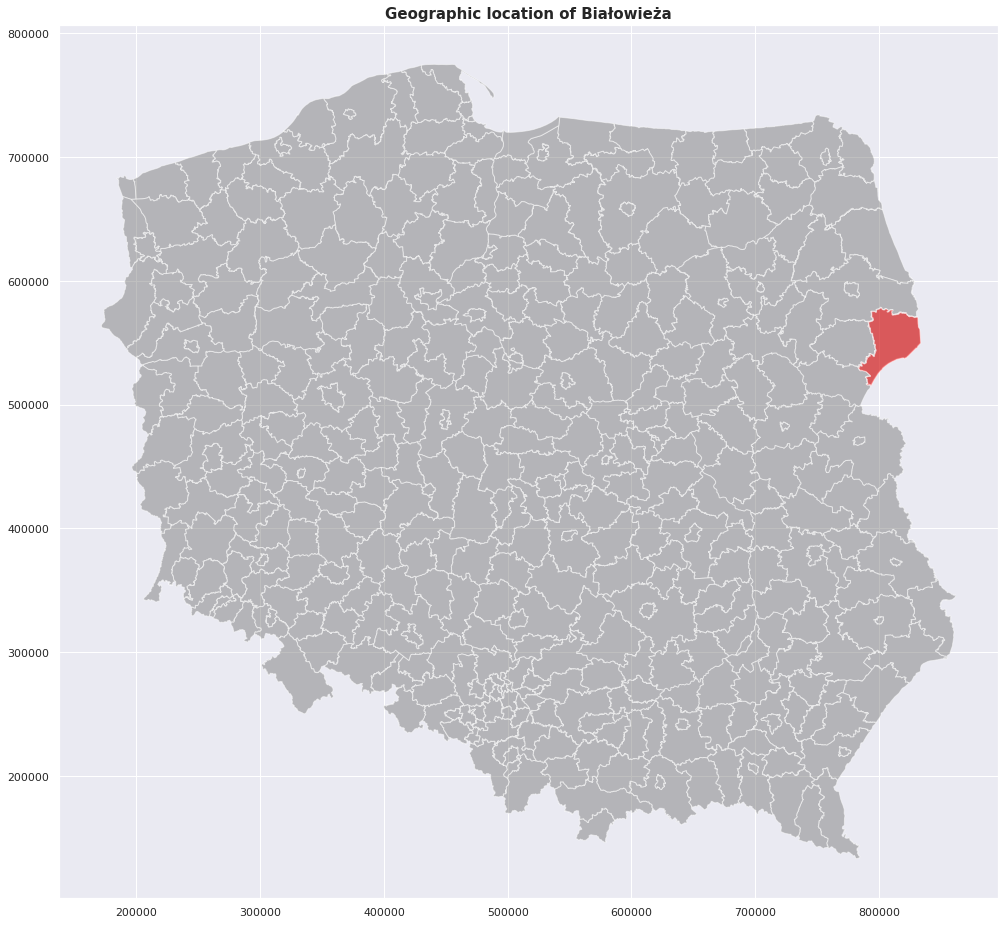

In [ ]:
map_shp = gpd.read_file("Powiaty.shp")
map_hajnowski = map_shp[map_shp['JPT_NAZWA_'] == "powiat hajnowski"]
map_hajnowski

fig, ax = plt.subplots(figsize=(15,15))
map_shp.plot(ax=ax, alpha=0.5,color='grey')
map_hajnowski.plot(ax=ax, alpha=0.5,color='red')

plt.title('Geographic location of Białowieża', fontsize=15,fontweight='bold')
plt.show()

On the chart below we can see the changes to number of baptisms, weddings and deaths recorded by the orthodox church i Białowieża through the years. Major world events influencing the changes were described on the chart.

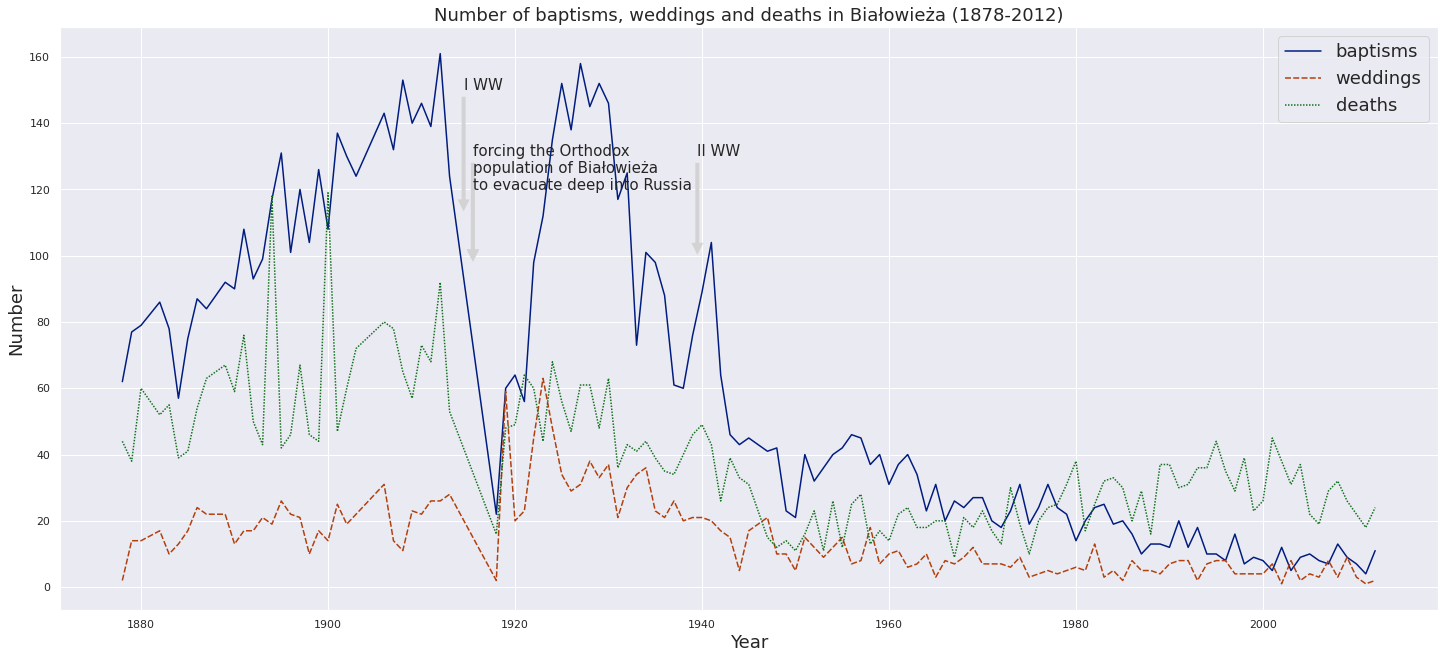

In [ ]:
url_data = (r'https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_visualisation.xlsx?raw=true')
DF = pd.read_excel(url_data)
plt.figure(figsize=(22,10))
plt.title("Number of baptisms, weddings and deaths in Białowieża (1878-2012)", fontsize=18)
g=sns.lineplot(x=DF["rok"], y=DF["liczba odnotowanych"], hue=DF["zdarzenie"], style=DF["zdarzenie"], palette='dark', legend=True, ci=True)

plt.annotate('I WW', xy=(1914.5, 113), xytext=(1914.5, 150), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('II WW', xy=(1939.5, 100), xytext=(1939.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('forcing the Orthodox', xy=(1915.5, 98), xytext=(1915.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('population of Białowieża', xy=(1915.5, 98), xytext=(1915.5, 125), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('to evacuate deep into Russia', xy=(1915.5, 98), xytext=(1915.5, 120), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.ylabel('Number', fontsize=18)
plt.xlabel('Year',fontsize=18 )
plt.legend(fontsize=18 )

sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')
sns.set_theme()

Some of the information in the data is missing and it is represented on the chart below. As one can see, in late 1910s the village population needed to go into hiding, which caused the lack of records for that time.

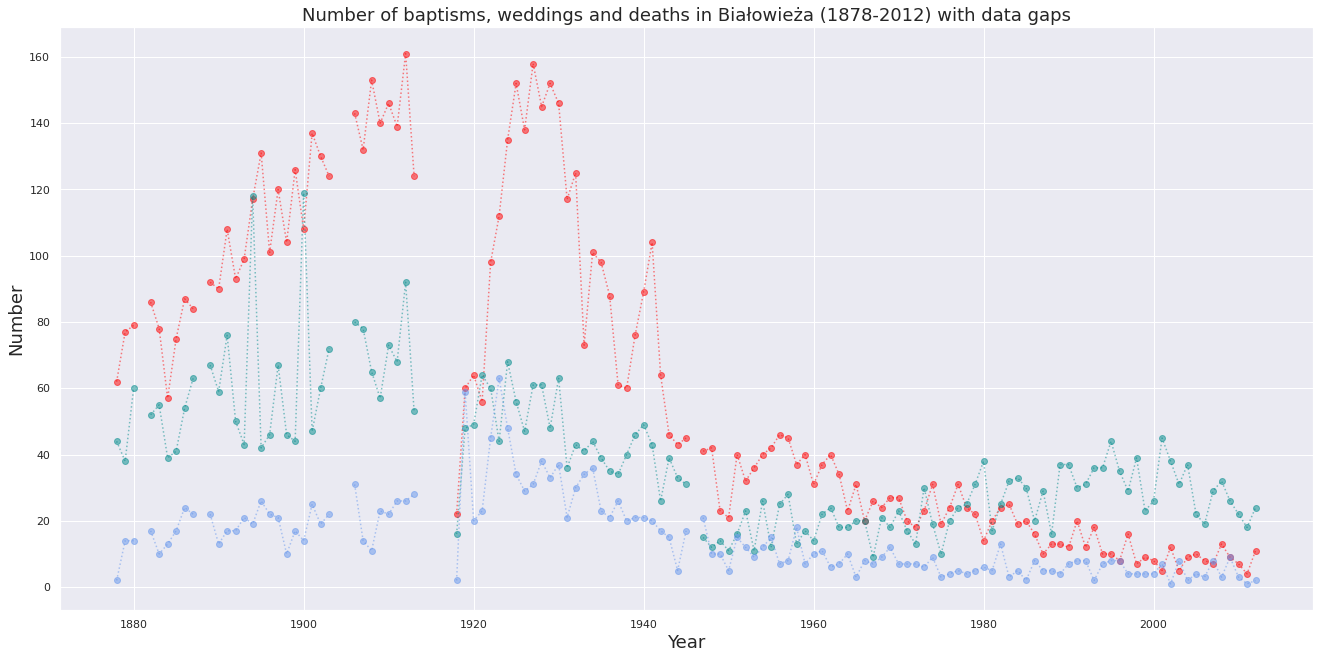

In [ ]:
Data1 = DF[DF['zdarzenie'] == 'baptisms']
Data2 = DF[DF['zdarzenie'] == 'deaths']
Data3 = DF[DF['zdarzenie'] == 'weddings']

cols_plot = [ 'liczba odnotowanych', "rok"]
fig, ax = plt.subplots()
ax.plot(Data1["rok"], Data1["liczba odnotowanych"],marker='o', color="red",alpha=0.5, linestyle='dotted')
ax.plot(Data2["rok"], Data2["liczba odnotowanych"],marker='o', color="darkcyan",alpha=0.5, linestyle='dotted')
ax.plot(Data3["rok"], Data3["liczba odnotowanych"],marker='o', color="cornflowerblue",alpha=0.5, linestyle='dotted')
plt.title("Number of baptisms, weddings and deaths in Białowieża (1878-2012) with data gaps", fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
fig.set_size_inches(20, 10)

The data is incomplete (most likely due to historical events during this period),and the longest break relates to the years 1914-1917. We can assume that it was influenced by World War I (beginning on July 28, 1914 - ending on November 11, 1918); the front was near Białowieża. It also turns out that during World War I, the Orthodox population of Białowieża was displaced and evacuated deep into Russia. 

After World War I, there was relative peace and appropriate conditions for starting a family. Therefore, in the interwar decade, i.e., from 1922 to 1932, a significant increase in births can be observed.

In 1941, the number of deaths and baptisms significantly decreased, caused by the mass displacement of the people of Białowieża to Siberia.

After World War II, the number of baptisms and deaths successively decreased, which led to a decline in the number of inhabitants of Białowieża and the conclusion that there are less and less Orthodox Christians in this area.


In the following graphs we can see some statistics for the variables from the original dataset.

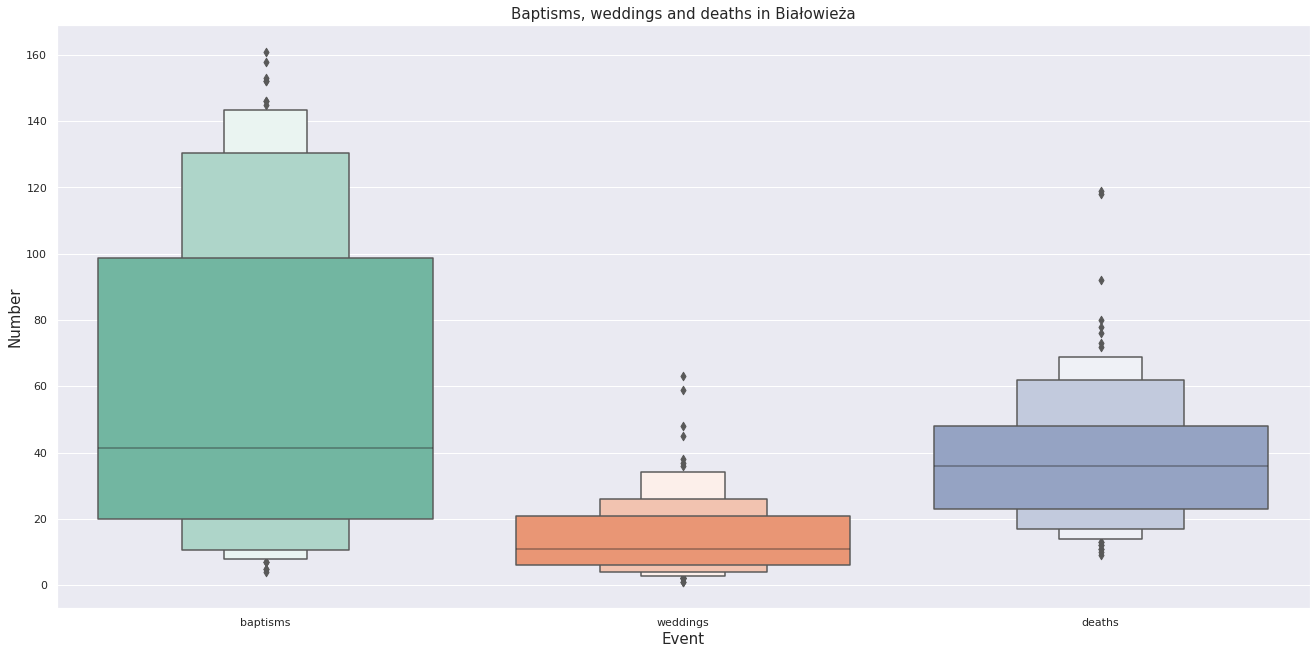

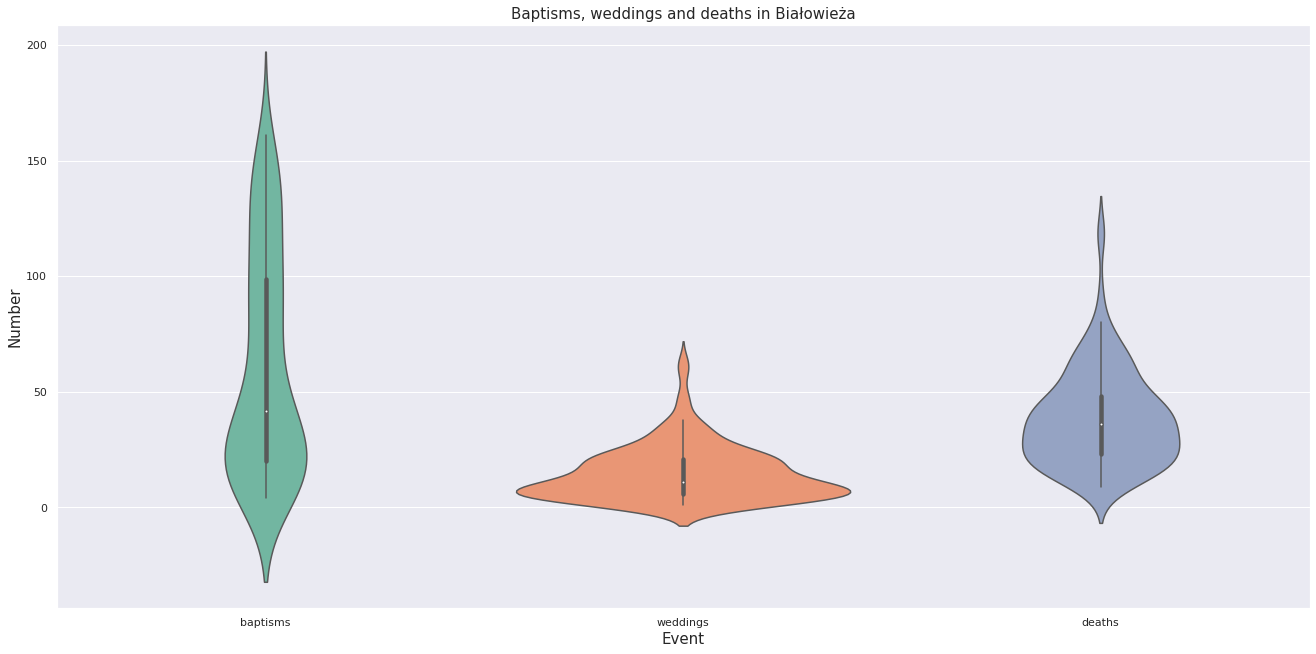

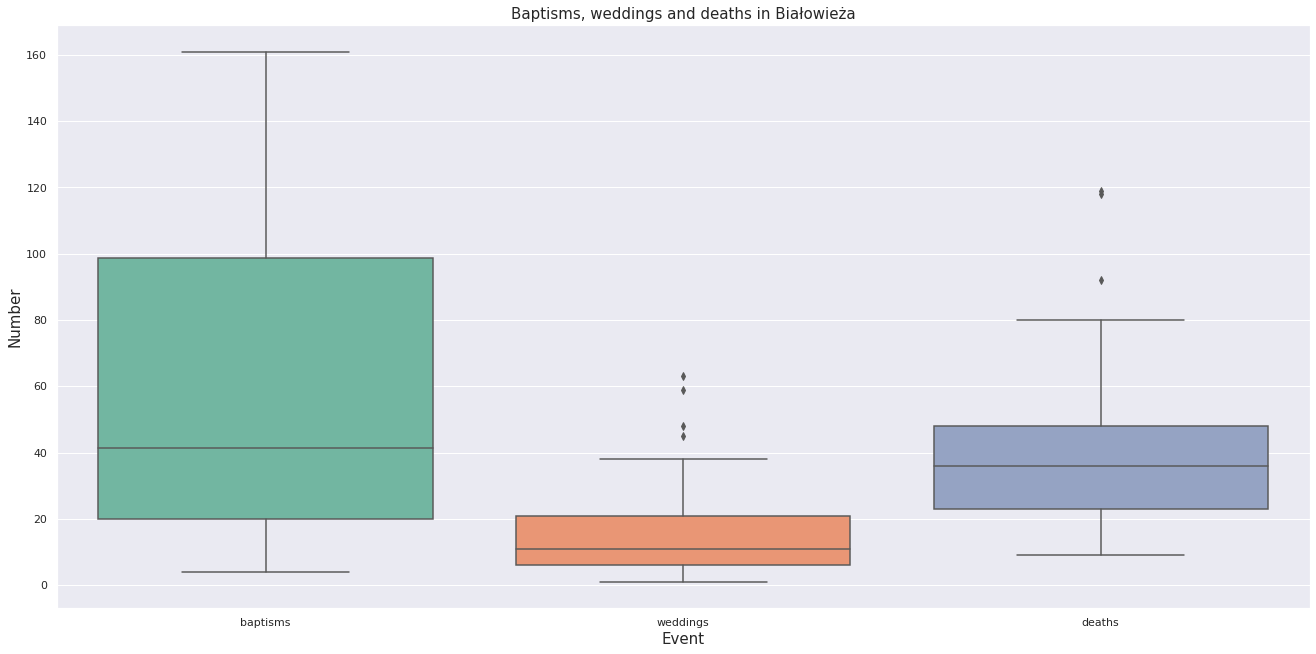

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )
plt.show()

plt.figure(figsize=(20, 10))
sns.violinplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )
plt.show()

plt.figure(figsize=(20, 10))
sns.boxplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in Białowieża",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )
plt.show()

Baptisms have the greatest variation in data, while data for weddings are the most concentrated.
Baptisms and deaths have similar mean values (around 40). For weddings, the value is below 20.
Similarly for the median - the difference between baptisms and deaths is not large (white points in the second graph).
The most outlier observations were identified for deaths, but these were for all three variables).

# ***analysis***

##***dependency analysis***

In [ ]:
merged_df = pd.merge(df_aggregateddata, DF, on="rok")

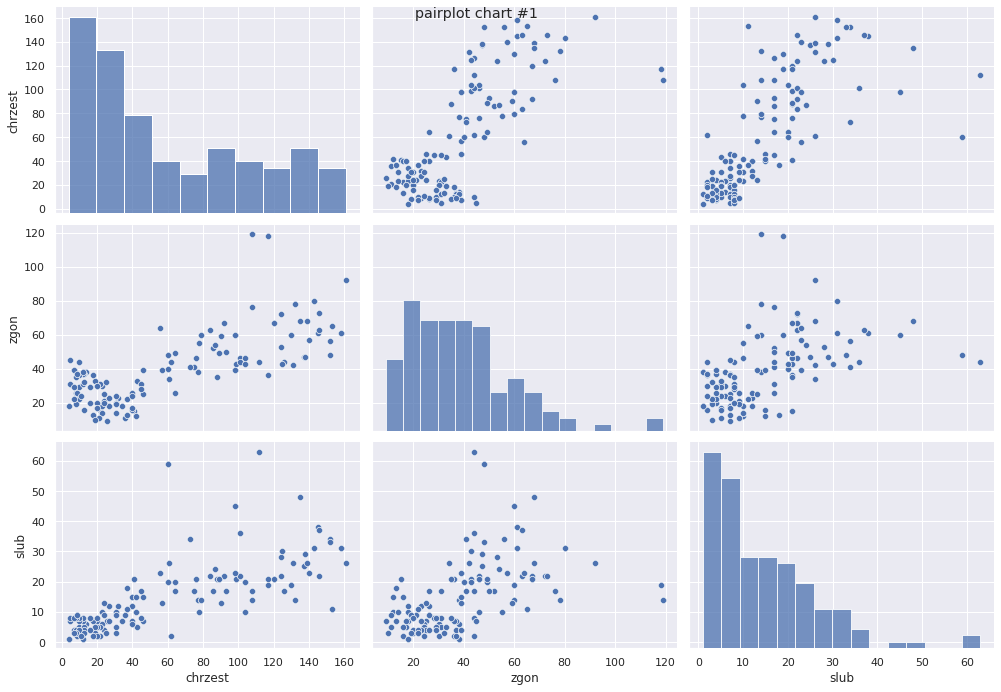

In [ ]:
g=sns.pairplot(merged_df, x_vars=["chrzest", "zgon", "slub"], y_vars=["chrzest", "zgon", "slub"])
g.fig.suptitle("pairplot chart #1")
g.fig.set_size_inches(15,10)

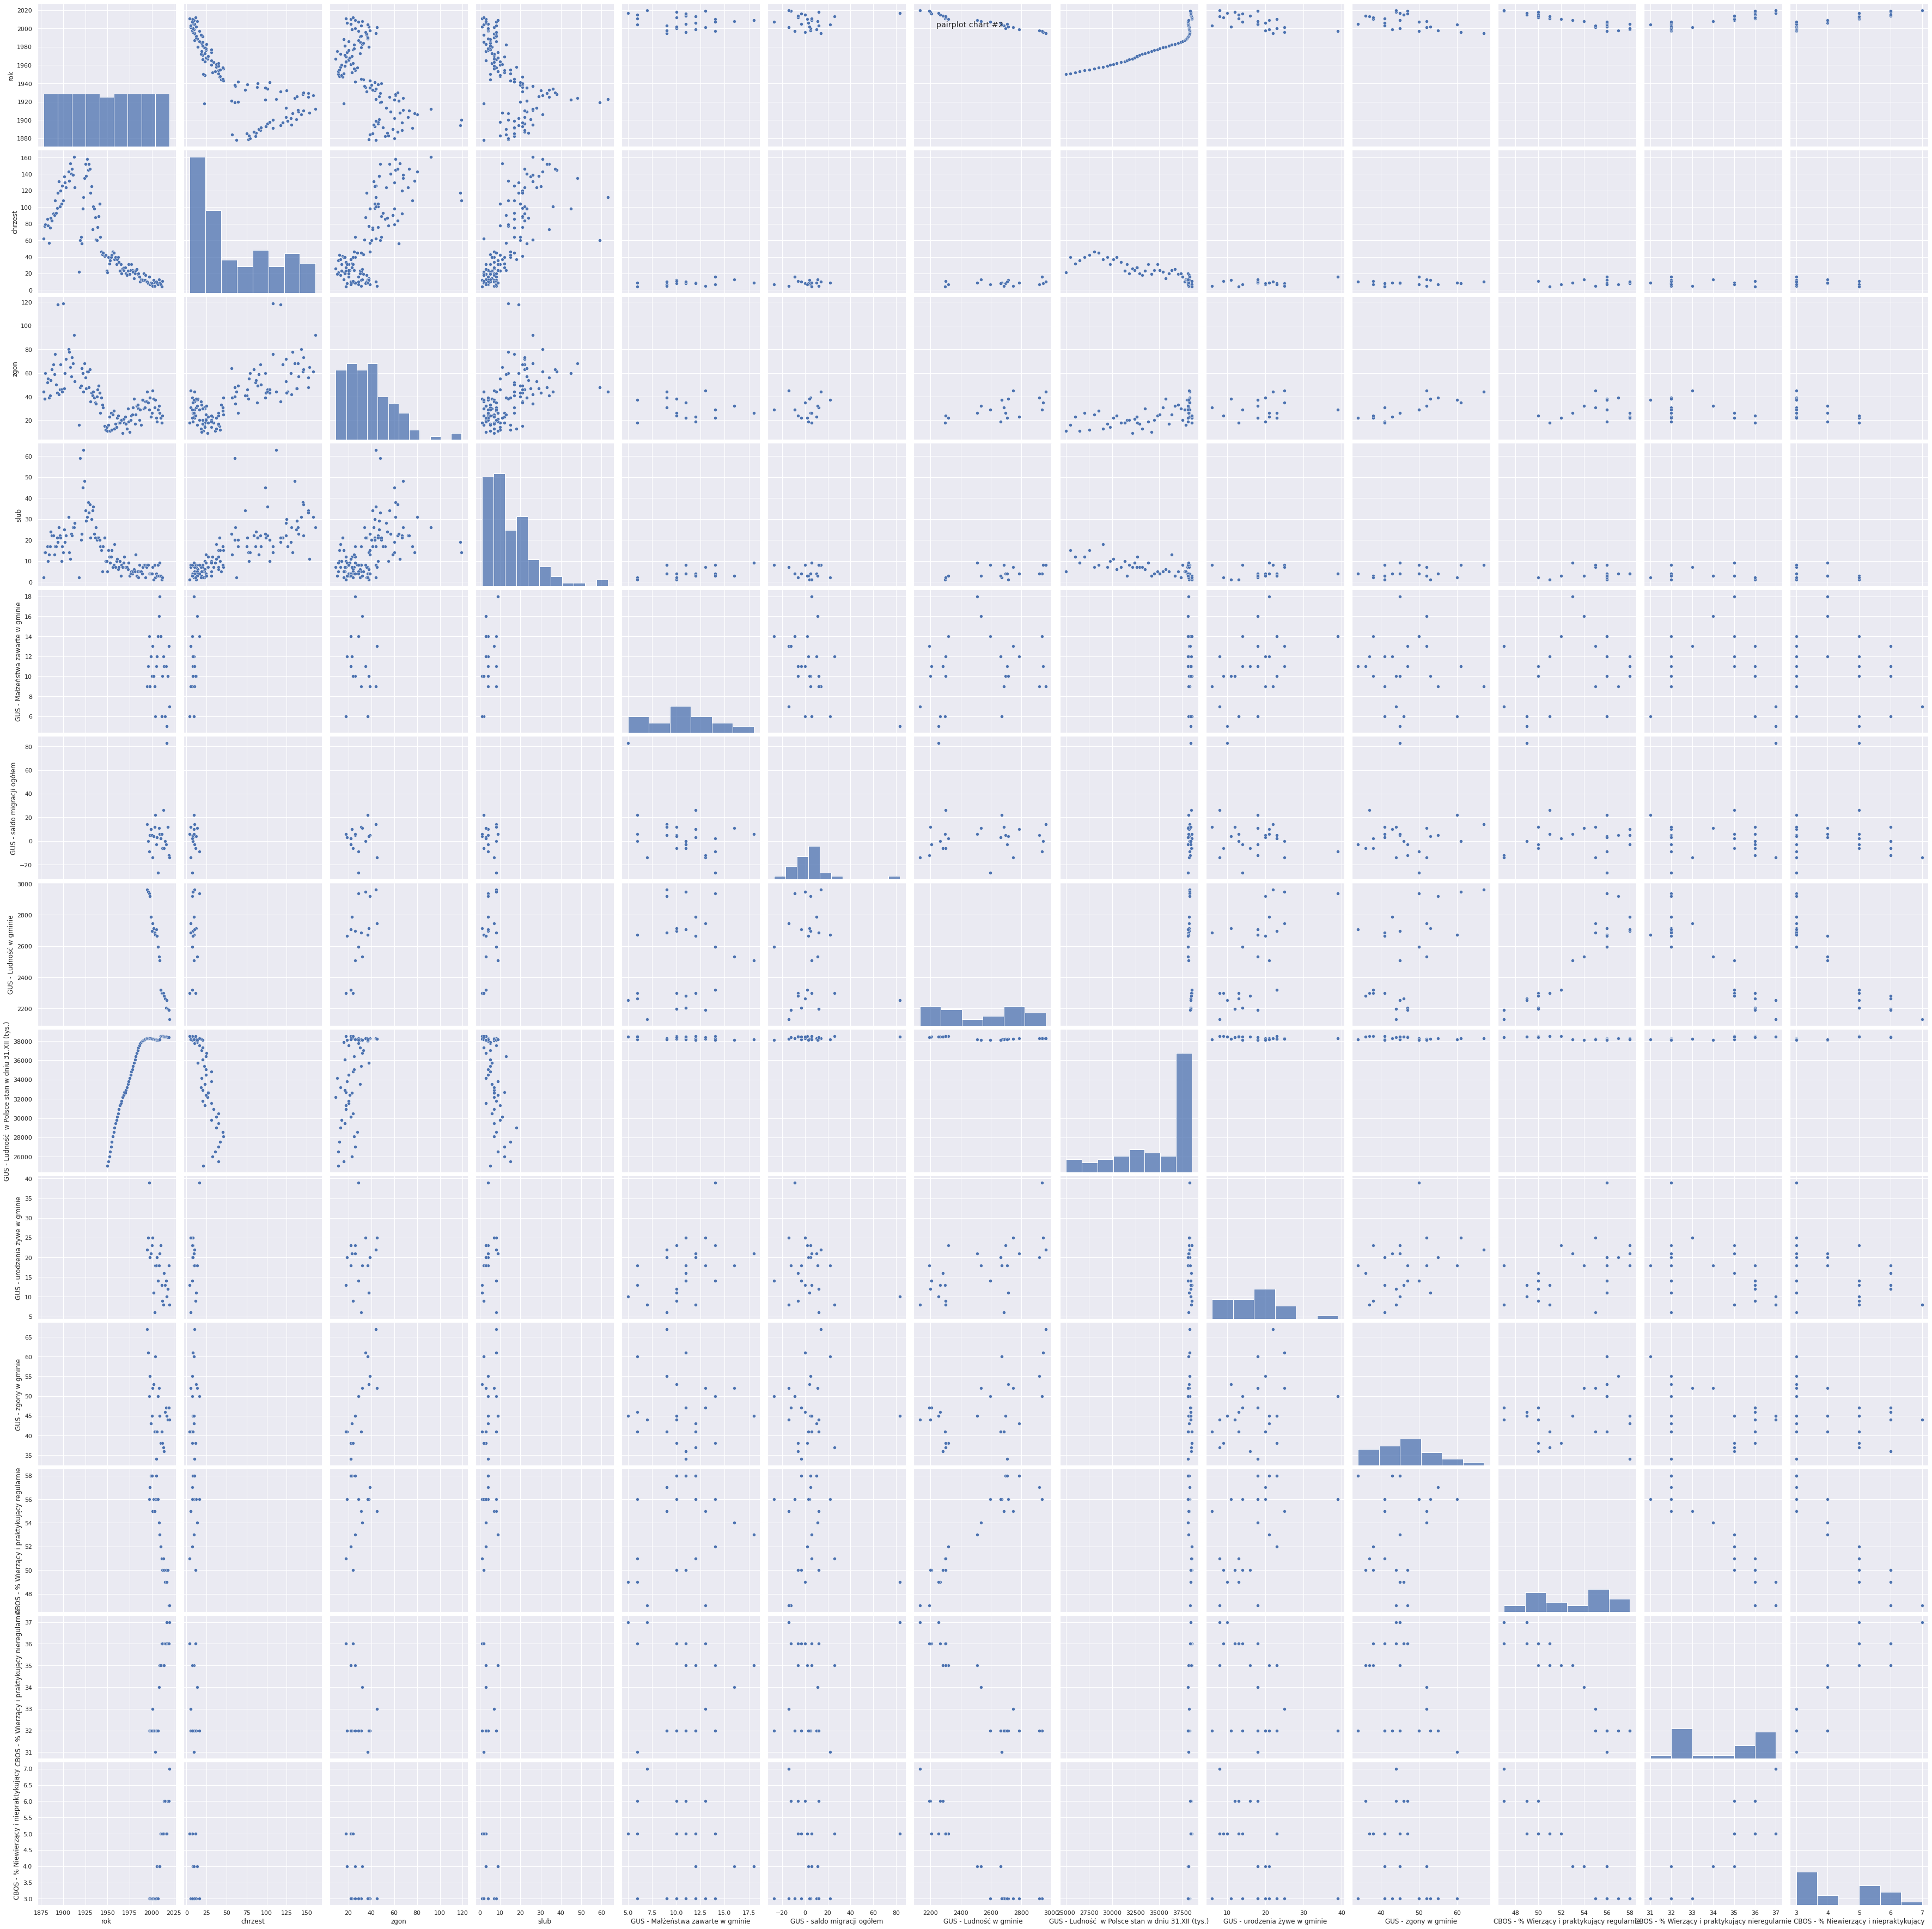

In [ ]:
g=sns.pairplot(df_aggregateddata, y_vars=["rok", "chrzest", "zgon", "slub", "GUS - Małżeństwa zawarte w gminie", "GUS - saldo migracji ogółem", "GUS - Ludność w gminie",
                                  "GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)", "GUS - urodzenia żywe w gminie", "GUS - zgony w gminie",
                                  "CBOS - % Wierzący i praktykujący regularnie", "CBOS - % Wierzący i praktykujący nieregularnie", "CBOS - % Niewierzący i niepraktykujący"],
               x_vars= ["rok", "chrzest", "zgon", "slub", "GUS - Małżeństwa zawarte w gminie", "GUS - saldo migracji ogółem", "GUS - Ludność w gminie",
                                  "GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)", "GUS - urodzenia żywe w gminie", "GUS - zgony w gminie",
                                  "CBOS - % Wierzący i praktykujący regularnie", "CBOS - % Wierzący i praktykujący nieregularnie", "CBOS - % Niewierzący i niepraktykujący"], height=5, dropna=True)
g.fig.suptitle("pairplot chart #2")
g.fig.set_size_inches(50,50)

Pair plot shows catterplot matrix it is used to understand the best set of features to explain a relationship between two variables.
The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
Baptisms, marriages, deaths, and total migration balance have right-skewed distributions.
Population in Poland is the only variable with a left-skewed distribution. 

From the matrix, we can infer the existence of relationships between the following pairs of variables:
* weddings-baptisms
* weddings - deaths
* deaths - baptisms
* population in Poland - baptisms
* population in commune - percentage of non-believers and non-baptists
* population in commune - percentage of believers and irregular practitioners
* population in commune - percentage of believers and practicing regularly 
(relationship stronger than the previous two pairs)
* deaths - deaths in the commune
* deaths - percentage of believers and practicing irregularly
* deaths - percentage of believers and regular practitioners
* deaths - percentage of non-believers and non-practitioners (the more deaths the fewer non-believers - this is quite surprising as younger people are more likely to declare themselves non-believers than older people who are more likely to die)
* a relationship also exists between the three variables of religiosity






## ***correlation***

In [ ]:
#correlation
korel = df_aggregateddata.corr()
df_aggregateddata.corr()

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
rok,1.000000,-0.800298,-0.571327,-0.630441,-0.165181,0.105424,-0.978255,0.917230,-0.609959,-0.530095,-0.930674,0.897718,0.923629
chrzest,-0.800298,1.000000,0.734576,0.740269,0.326517,0.019477,0.239191,-0.861808,0.380729,0.167780,0.131010,-0.129532,-0.123442
slub,-0.571327,0.734576,1.000000,0.506627,0.379970,-0.233923,0.387479,-0.585242,0.149044,0.292203,0.149049,-0.130163,-0.348871
zgon,-0.630441,0.740269,0.506627,1.000000,-0.127775,0.072397,0.595813,0.590339,0.125313,0.830574,0.251019,-0.398130,-0.564912
GUS - Małżeństwa zawarte w gminie,-0.165181,0.326517,0.379970,-0.127775,1.000000,-0.409802,0.178516,-0.332330,0.452830,-0.081880,0.248761,-0.197831,-0.248697
GUS - saldo migracji ogółem,0.105424,0.019477,-0.233923,0.072397,-0.409802,1.000000,-0.096963,0.170489,-0.253708,0.022278,-0.104969,0.188214,0.026213
GUS - Ludność w gminie,-0.978255,0.239191,0.387479,0.595813,0.178516,-0.096963,1.000000,-0.665547,0.612382,0.565144,0.930387,-0.921283,-0.925625
GUS - Ludność w Polsce stan w dniu 31.XII (tys.),0.917230,-0.861808,-0.585242,0.590339,-0.332330,0.170489,-0.665547,1.000000,-0.272938,-0.377598,-0.749222,0.775462,0.762666
GUS - urodzenia żywe w gminie,-0.609959,0.380729,0.149044,0.125313,0.452830,-0.253708,0.612382,-0.272938,1.000000,0.359363,0.470572,-0.434410,-0.429872
GUS - zgony w gminie,-0.530095,0.167780,0.292203,0.830574,-0.081880,0.022278,0.565144,-0.377598,0.359363,1.000000,0.264394,-0.359419,-0.388005


The correlation matrix shows that the highest (above 0,8 / lower then -0,8)correlations were recorded between the following pairs of variables:

* year - population in municipality (-0.97)
* Percentage of believers practicing regularly - Percentage of believers  practicing irregularly(-0.94)
* Percentage of non-believers and non-practitioners - Percentage of believers practicing regularly(-0.94)
* year - percentage of believers and regular practitioners (-0.93)
* Population in the municipality - percentage of believers and regular practitioners (0.93)
* Population in municipality - percentage of believers practicing irregularly (-0.92)
* Population in municipality - percentage of non-believers and non-practitioners (0.92)
* year - percentage of persons believing and not practicing (0.92)
* year - population in Poland - balance (0.91)
* year - percentage of believers practicing irregularly (0.89)
* baptism - population in Poland - balance (-0.86)
* deaths - deaths in the municipality (0.83)
* year - baptism ( -0.8)
* Percentage of believers and those who practice irregularly - Population in Poland - outstanding balance (0.77)
* Percentage of non-believers and non-practitioners - population in Poland - balance (0.76)
* Percentage of believers and regular practitioners - Poland's population - average (0.74)
* Percentage of persons who do not believe and practice regularly - Percentage of persons who believe and practice irregularly(-0.90)
death - baptism (0.74)
* marriage - baptism (0.73)

## ***filling in data gaps***
There is a large amount of data gaps in the dataset. This is mostly due to the fact that variables from other sources than orthodox church records weren't available as early as 1878.

In [ ]:
# sum of data gaps
df_aggregateddata.isnull().sum()

rok                                                    0
chrzest                                               17
slub                                                  17
zgon                                                  17
GUS - Małżeństwa zawarte w gminie                    117
GUS - saldo migracji ogółem                          117
GUS - Ludność w gminie                               117
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)     73
GUS - urodzenia żywe w gminie                        117
GUS - zgony w gminie                                 117
CBOS - % Wierzący i praktykujący regularnie          119
CBOS - % Wierzący i praktykujący nieregularnie       119
CBOS - % Niewierzący i niepraktykujący               119
dtype: int64

In [ ]:
CORREL = df_aggregateddata.corr()
CORREL['chrzest'].to_frame().sort_values('chrzest')
CORREL = df_aggregateddata.corr()
CORREL['slub'].to_frame().sort_values('slub')
CORREL = df_aggregateddata.corr()
CORREL['zgon'].to_frame().sort_values('zgon')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Małżeństwa zawarte w gminie'].to_frame().sort_values('GUS - Małżeństwa zawarte w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - saldo migracji ogółem'].to_frame().sort_values('GUS - saldo migracji ogółem')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Ludność w gminie'].to_frame().sort_values('GUS - Ludność w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].to_frame().sort_values('GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)')
CORREL = df_aggregateddata.corr()
CORREL['GUS - urodzenia żywe w gminie'].to_frame().sort_values('GUS - urodzenia żywe w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - zgony w gminie'].to_frame().sort_values('GUS - zgony w gminie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Wierzący i praktykujący regularnie'].to_frame().sort_values('CBOS - % Wierzący i praktykujący regularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Wierzący i praktykujący nieregularnie'].to_frame().sort_values('CBOS - % Wierzący i praktykujący nieregularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % Niewierzący i niepraktykujący'].to_frame().sort_values('CBOS - % Niewierzący i niepraktykujący')

,CBOS - % Niewierzący i niepraktykujący
CBOS - % Wierzący i praktykujący regularnie,-0.940103
GUS - Ludność w gminie,-0.925625
zgon,-0.564912
GUS - urodzenia żywe w gminie,-0.429872
GUS - zgony w gminie,-0.388005
slub,-0.348871
GUS - Małżeństwa zawarte w gminie,-0.248697
chrzest,-0.123442
GUS - saldo migracji ogółem,0.026213
GUS - Ludność w Polsce stan w dniu 31.XII (tys.),0.762666


In [ ]:
df_aggregateddata['chrzest'] = df_aggregateddata.groupby('zgon')['chrzest'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['chrzest'].fillna(method='ffill', inplace=True)  
df_aggregateddata['zgon'] = df_aggregateddata.groupby('GUS - zgony w gminie')['zgon'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['zgon'].fillna(method='ffill', inplace=True)  
df_aggregateddata['slub'] = df_aggregateddata.groupby('chrzest')['slub'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['slub'].fillna(method='ffill', inplace=True)  
df_aggregateddata['GUS - Małżeństwa zawarte w gminie'] = df_aggregateddata.groupby('GUS - urodzenia żywe w gminie')['GUS - Małżeństwa zawarte w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Małżeństwa zawarte w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - saldo migracji ogółem'] = df_aggregateddata.groupby('GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)')['GUS - saldo migracji ogółem'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - saldo migracji ogółem'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - Ludność w gminie'] = df_aggregateddata.groupby('CBOS - % Wierzący i praktykujący regularnie')['GUS - Ludność w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Ludność w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'] = df_aggregateddata.groupby('rok')['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - urodzenia żywe w gminie'] = df_aggregateddata.groupby('GUS - Ludność w gminie')['GUS - urodzenia żywe w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - urodzenia żywe w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - zgony w gminie'] = df_aggregateddata.groupby('zgon')['GUS - zgony w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - zgony w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Wierzący i praktykujący regularnie'] = df_aggregateddata.groupby('GUS - Ludność w gminie')['CBOS - % Wierzący i praktykujący regularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Wierzący i praktykujący regularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Wierzący i praktykujący nieregularnie'] = df_aggregateddata.groupby('CBOS - % Niewierzący i niepraktykujący')['CBOS - % Wierzący i praktykujący nieregularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Wierzący i praktykujący nieregularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % Niewierzący i niepraktykujący'] = df_aggregateddata.groupby('rok')['CBOS - % Niewierzący i niepraktykujący'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % Niewierzący i niepraktykujący'].fillna(method='ffill', inplace=True) 


df_aggregateddata.to_csv(r'fillna_data_bialowieza.csv', index = False)

In [ ]:
df_aggregateddata.isnull().sum()

rok                                                    0
chrzest                                                0
slub                                                   0
zgon                                                 117
GUS - Małżeństwa zawarte w gminie                    117
GUS - saldo migracji ogółem                          117
GUS - Ludność w gminie                               119
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)     72
GUS - urodzenia żywe w gminie                        119
GUS - zgony w gminie                                 117
CBOS - % Wierzący i praktykujący regularnie          119
CBOS - % Wierzący i praktykujący nieregularnie       119
CBOS - % Niewierzący i niepraktykujący               119
dtype: int64

Based on correlations found between individual variables, data gaps were partially filled.


In [ ]:
df_aggregateddata.dropna(inplace=True)
df_aggregateddata.to_csv(r'df_bialowieza.csv', index = False)

To allow further work on the collection, the remaining missing data was removed.
A table with the observations that remained in the collection is shown below.

In [ ]:
df_aggregateddata

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący
119,1997,16.0,4.0,29.0,14.0,-9.0,2938.0,38290.0,39.0,50.0,56.0,32.0,3.0
120,1998,7.0,4.0,39.0,9.0,5.0,2919.0,38277.0,20.0,55.0,57.0,32.0,3.0
121,1999,9.0,4.0,23.0,12.0,10.0,2787.0,38263.0,21.0,43.0,58.0,32.0,3.0
122,2000,8.0,4.0,26.0,10.0,5.0,2697.0,38254.0,23.0,45.0,58.0,32.0,3.0
123,2001,5.0,7.0,45.0,13.0,-14.0,2747.0,38242.0,25.0,52.0,55.0,33.0,3.0
124,2002,12.0,1.0,38.0,10.0,4.0,2714.0,38219.0,11.0,53.0,56.0,32.0,3.0
125,2003,5.0,8.0,31.0,9.0,12.0,2687.0,38191.0,6.0,41.0,55.0,32.0,3.0
126,2004,9.0,2.0,37.0,6.0,22.0,2671.0,38174.0,18.0,60.0,56.0,31.0,3.0
127,2005,10.0,4.0,22.0,11.0,-3.0,2707.0,38157.0,18.0,34.0,58.0,32.0,3.0
128,2006,8.0,3.0,19.0,12.0,3.0,2664.0,38125.0,20.0,41.0,56.0,32.0,4.0


## ***Regression***

The variable "baptism" was set as the dependent variable.

In [ ]:
X = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y = df_aggregateddata["chrzest"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1.209
Date:                Sun, 30 Jan 2022   Prob (F-statistic):              0.380
Time:                        19:24:56   Log-Likelihood:                -47.872
No. Observations:                  24   AIC:                             121.7
Df Residuals:                      11   BIC:                             137.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

The model created from the regression has a low fit of 0.57.
For no variable, p-value is less than/equal to 0.05.
The variable "wedding" appeared to have the greatest effect on the number of baptisms (-0.94) while the smallest variable "deaths in the municipality" - almost zero.
Despite the above problems, we tested the difference between the prediction and the real values. The effects can be seen in the graph below.

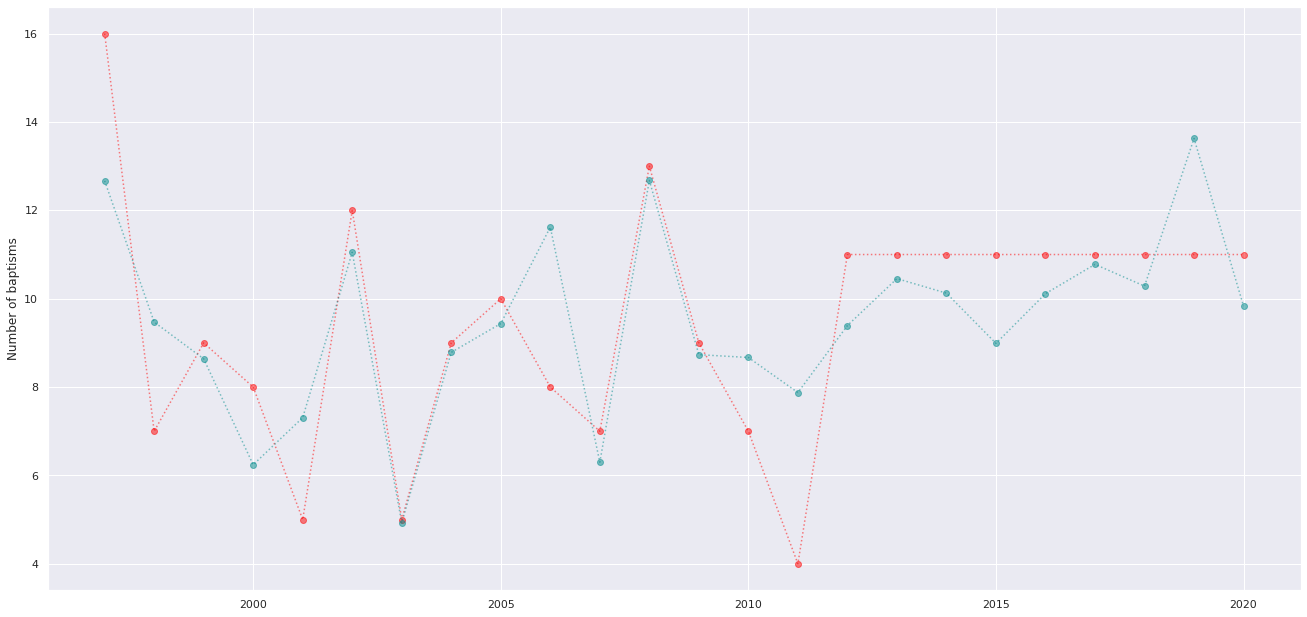

In [ ]:
df_aggregateddata['Y_pred'] = Y_pred
fig, ax = plt.subplots()
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["chrzest"],marker='o',alpha=0.5, linestyle='dotted', color="red")
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["Y_pred"],marker='o',alpha=0.5, linestyle='dotted', color="darkcyan")
ax.set_ylabel('Number of baptisms')
fig.set_size_inches(20, 10)

* The largest differences between projected and real values were in 1997 , 2011 and 2019.

* The best predicted values were for the following years: 2004, 2008, 2009, 2016

## ***PCA*** 


*Due to the previously indicated high correlation, a principal component analysis (PCA) was conducted.

*In this part of the analysis (PCA +FA), we no longer focus on explaining the selected variable. 

*The dataset will be treated as a description of the situation of the Bialowieza community.




In [ ]:
%%R
install.packages("AMR")
install.packages("readr")
install.packages("readxl")
install.packages("devtools")
install.packages("ggplot2")

In [ ]:
%%R
library(AMR)
library(readr)
library(readxl)
library(devtools)
library(ggplot2)

In [ ]:
%%R
df_PCA <- read_csv("df_bialowieza.csv")
df_PCA

Rows: 24 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): rok, chrzest, slub, zgon, GUS - Małżeństwa zawarte w gminie, GUS -...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 24 × 13
     rok chrzest  slub  zgon `GUS - Małżeństw… `GUS - saldo mi… `GUS - Ludność …
   <dbl>   <dbl> <dbl> <dbl>             <dbl>            <dbl>            <dbl>
 1  1997      16     4    29                14               -9             2938
 2  1998       7     4    39                 9                5             2919
 3  1999       9     4    23                12               10             2787
 4  2000       8     4    26                10                5             2697
 5  2001       5     7    45                13              -14             2747
 6  2002      12     1    38                10               

In [ ]:
%%R
summary(df_PCA)

      rok          chrzest           slub            zgon     
 Min.   :1997   Min.   : 4.00   Min.   :1.000   Min.   :18.0  
 1st Qu.:2003   1st Qu.: 7.75   1st Qu.:2.000   1st Qu.:24.0  
 Median :2008   Median :10.50   Median :2.500   Median :26.0  
 Mean   :2008   Mean   : 9.50   Mean   :3.458   Mean   :27.5  
 3rd Qu.:2014   3rd Qu.:11.00   3rd Qu.:4.000   3rd Qu.:29.5  
 Max.   :2020   Max.   :16.00   Max.   :9.000   Max.   :45.0  
 GUS - Małżeństwa zawarte w gminie GUS - saldo migracji ogółem
 Min.   : 5.00                     Min.   :-27.000            
 1st Qu.: 9.00                     1st Qu.: -6.000            
 Median :11.00                     Median :  3.500            
 Mean   :10.79                     Mean   :  4.792            
 3rd Qu.:13.00                     3rd Qu.: 10.250            
 Max.   :18.00                     Max.   : 83.000            
 GUS - Ludność w gminie GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)
 Min.   :2130           Min.   :38116       

1. PCA analysis based on non-scaled variables:

In [ ]:
%%R
pc <- prcomp(df_PCA, center = TRUE, scale = FALSE)
summary(pc)

Importance of components:
                            PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     275.9265 92.4753 20.2221 7.49359 5.91409 3.27465 2.72248
Proportion of Variance   0.8935  0.1004  0.0048 0.00066 0.00041 0.00013 0.00009
Cumulative Proportion    0.8935  0.9938  0.9986 0.99928 0.99969 0.99982 0.99991
                           PC8     PC9    PC10    PC11   PC12   PC13
Standard deviation     1.99317 1.52888 0.97872 0.69220 0.4741 0.2833
Proportion of Variance 0.00005 0.00003 0.00001 0.00001 0.0000 0.0000
Cumulative Proportion  0.99995 0.99998 0.99999 1.00000 1.0000 1.0000


Result : the first two principal components explain more than 90% (92.47%).
The table below shows how much each variable contributes to the Principal Components.

In [ ]:
%%R
pc

Standard deviations (1, .., p=13):
 [1] 275.9264675  92.4752533  20.2220896   7.4935915   5.9140933   3.2746487
 [7]   2.7224838   1.9931722   1.5288833   0.9787185   0.6921954   0.4740936
[13]   0.2833238

Rotation (n x k) = (13 x 13):
                                                           PC1           PC2
rok                                                0.024069313 -2.200931e-02
chrzest                                            0.001461658 -1.125873e-03
slub                                              -0.004299380 -7.025104e-03
zgon                                              -0.012222536 -9.246949e-04
GUS - Małżeństwa zawarte w gminie                 -0.003295828 -7.873499e-03
GUS - saldo migracji ogółem                        0.010765942  1.423118e-02
GUS - Ludność w gminie                            -0.904526378  4.243270e-01
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.424788262  9.047537e-01
GUS - urodzenia żywe w gminie                     -0.014011411  2.0787

2. PCA analysis based on scaled variables:

In [ ]:
#scaling of variables
%%R
df.detr.pc <- prcomp(df_PCA, center = TRUE, scale = TRUE)
summary(df.detr.pc)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.555 1.3088 1.1939 1.07696 0.88503 0.76866 0.5746
Proportion of Variance 0.502 0.1318 0.1096 0.08922 0.06025 0.04545 0.0254
Cumulative Proportion  0.502 0.6338 0.7435 0.83268 0.89293 0.93838 0.9638
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.47604 0.34116 0.22893 0.20738 0.15588 0.09054
Proportion of Variance 0.01743 0.00895 0.00403 0.00331 0.00187 0.00063
Cumulative Proportion  0.98121 0.99016 0.99419 0.99750 0.99937 1.00000


It turned out that after scaling, it takes 6 principal components to get
an explanation of more than 90%.

In [ ]:
%%R
df.detr.pc

Standard deviations (1, .., p=13):
 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082

Rotation (n x k) = (13 x 13):
                                                          PC1          PC2
rok                                                0.36580938  0.044977885
chrzest                                            0.08794661  0.030222182
slub                                              -0.23377372  0.289829391
zgon                                              -0.22072949 -0.351934213
GUS - Małżeństwa zawarte w gminie                 -0.14293424  0.581549442
GUS - saldo migracji ogółem                        0.08625071 -0.456295055
GUS - Ludność w gminie                            -0.37636039 -0.057669019
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.31597810 -0.006439592
GUS - urodzenia żywe w gminie                     -0.22186960  0.268182280
GUS - zgony w gminie      

In [ ]:
%%R
df.detr.pc$sdev


 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082


PCA - graphs

The following graphs show the relationship between the first two principal components, which together explain 63.4% of the total variation.
Variables are definitely more related to PC1.

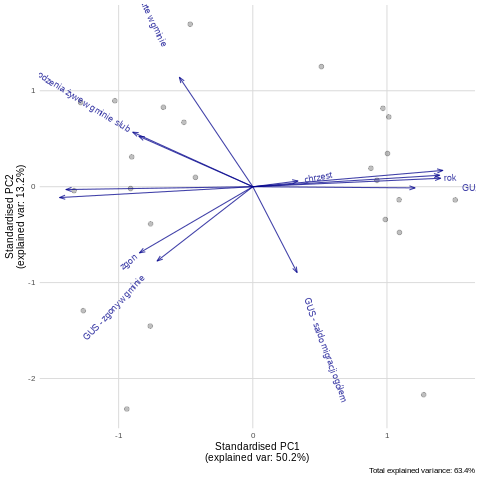

In [ ]:
%%R
ggplot_pca(df.detr.pc)

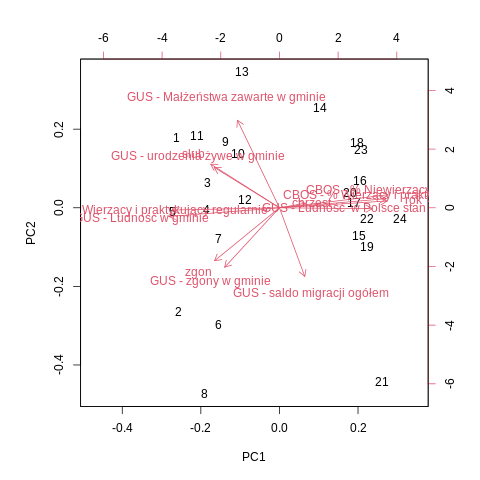

In [ ]:
%%R
biplot(df.detr.pc)

## ***Factor analysis***

In [ ]:
%%R 
install.packages("psych")

In [ ]:
%%R
library(psych)

Exploratory model - EFA

Estimation

In [ ]:
%%R
EFA_Model <- fa(df_PCA)
print(EFA_Model)

Factor Analysis using method =  minres
Call: fa(r = df_PCA)
Standardized loadings (pattern matrix) based upon correlation matrix
                                                    MR1    h2    u2 com
rok                                               -0.94 0.884 0.116   1
chrzest                                           -0.20 0.039 0.961   1
slub                                               0.54 0.291 0.709   1
zgon                                               0.51 0.258 0.742   1
GUS - Małżeństwa zawarte w gminie                  0.32 0.100 0.900   1
GUS - saldo migracji ogółem                       -0.19 0.035 0.965   1
GUS - Ludność w gminie                             0.98 0.955 0.045   1
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.) -0.77 0.595 0.405   1
GUS - urodzenia żywe w gminie                      0.51 0.263 0.737   1
GUS - zgony w gminie                               0.42 0.179 0.821   1
CBOS - % Wierzący i praktykujący regularnie        0.94 0.876 0.124   1
CBOS - 

A measure of the fit of the univariate model is the sum of squares, which for our model is 6.26 (the analysis is worth continuing because this value is greater than 1). Based on the result, we can conclude that 48% of the variance is explained using the univariate model.

The RMSR error is low at 0.13

In [ ]:
%%R
EFA_Model$loadings


Loadings:
                                                  MR1   
rok                                               -0.940
chrzest                                           -0.198
slub                                               0.540
zgon                                               0.508
GUS - Małżeństwa zawarte w gminie                  0.316
GUS - saldo migracji ogółem                       -0.187
GUS - Ludność w gminie                             0.977
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.) -0.771
GUS - urodzenia żywe w gminie                      0.513
GUS - zgony w gminie                               0.423
CBOS - % Wierzący i praktykujący regularnie        0.936
CBOS - % Wierzący i praktykujący nieregularnie    -0.934
CBOS - % Niewierzący i niepraktykujący            -0.955

                 MR1
SS loadings    6.260
Proportion Var 0.482


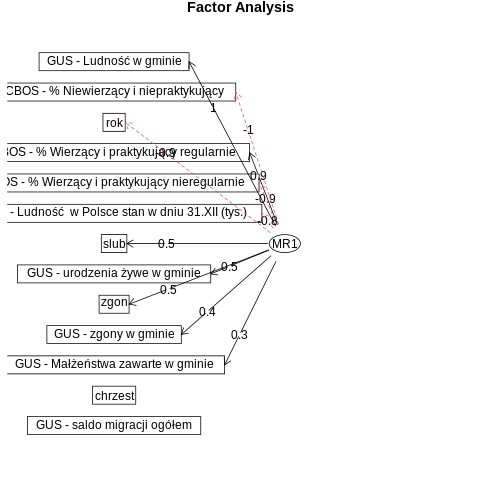

In [ ]:
%%R
fa.diagram(EFA_Model)

By using the fa() function, each variable was assigned a factor charge. This charge represents strength and direction of relationship between each element and factor. It can take values from -1 to 1. The higher the value, the stronger the relationship. The sign next to the value reflects the direction of the relationship, + indicates the same direction and - the opposite direction.

The strongest relationship with the factor was recorded for "Population in the municipality", "year", "percentage of people who believe and practice regularly".

Total migration balance and baptism show a lack of correlation, so they are not linked to MR1 in the diagram.

In [ ]:
%%R
summary(EFA_Model$scores)

      MR1         
 Min.   :-1.6840  
 1st Qu.:-0.8731  
 Median : 0.2138  
 Mean   : 0.0000  
 3rd Qu.: 0.9011  
 Max.   : 1.6100  


Using a one-dimensional kernel density estimator, we approximated the densities of the data distribution by creating a smoothed density curve in a nonparametric manner.
The blue line is shown for comparison with the normal distribution.
The smoothing of the graph is at 0.4766.

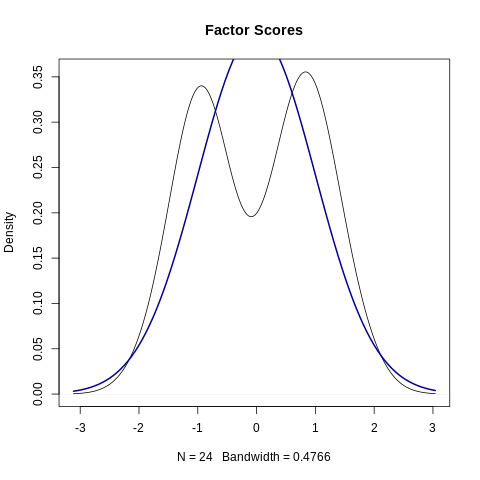

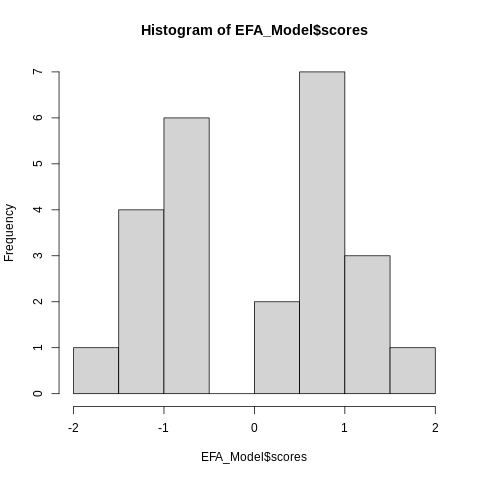

In [ ]:
%%R
m<-mean(EFA_Model$scores)
std<-sqrt(var(EFA_Model$scores))

plot(density(EFA_Model$scores, na.rm = TRUE), 
     main = "Factor Scores")
curve(dnorm(x, mean=m, sd=std), 
      col="darkblue", lwd=2, add=TRUE, yaxt="n")
hist(EFA_Model$scores)

After subjecting the general data to analysis, we proceeded to build the model. In  the following steps:

1. divide the sample into 2 parts (exploratory + confirmatory) with 12 observations per group.
2. comparing the samples whether due to the two subsamples have similar characteristics or different characteristics.

In [ ]:
%%R
N <- nrow(df_PCA)
indices <- seq(1, N)

indices_EFA <- sample(indices, floor(0.5*N))
indices_CFA <- indices[!(indices %in% indices_EFA)]

In [ ]:
%%R
indices_EFA <- gsub(",", "",indices_EFA)
indices_CFA <- gsub(",", "",indices_CFA)
indices_EFA <- as.numeric(indices_EFA)
indices_CFA <- as.numeric(indices_CFA)

describe(indices_EFA)  
indices_EFA <- char2numeric(indices_EFA)  

describe(indices_CFA)  
indices_CFA <- char2numeric(indices_CFA)  

In [ ]:
%%R
fa_EFA <- fa[indices_EFA, ]
fa_CFA <- fa[indices_CFA, ]

characteristics of both groups

In [ ]:
%%R
group_var <- vector("numeric", nrow(df_PCA))
group_var[indices_EFA] <- 1
group_var[indices_CFA] <- 2

fa_grouped <- cbind(df_PCA, group_var)
describeBy(fa_grouped, group = "group_var")


 Descriptive statistics by group 
group_var: 1
                                                  vars  n     mean     sd
rok                                                  1 12  2008.00   7.89
chrzest                                              2 12    10.00   3.05
slub                                                 3 12     4.08   2.54
zgon                                                 4 12    28.92   6.60
GUS - Małżeństwa zawarte w gminie                    5 12    11.25   3.96
GUS - saldo migracji ogółem                          6 12     7.33  26.52
GUS - Ludność w gminie                               7 12  2536.08 264.43
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)    8 12 38274.92 118.26
GUS - urodzenia żywe w gminie                        9 12    18.17   8.63
GUS - zgony w gminie                                10 12    45.75   7.19
CBOS - % Wierzący i praktykujący regularnie         11 12    53.17   3.97
CBOS - % Wierzący i praktykujący nieregularnie      12 12    33.

In [ ]:
%%R
lowerCor(df_PCA, use = "pairwise.complete.obs")

                                                  rok   chrzs slub  zgon 
rok                                                1.00                  
chrzest                                            0.22  1.00            
slub                                              -0.43 -0.42  1.00      
zgon                                              -0.46 -0.08  0.29  1.00
GUS - Małżeństwa zawarte w gminie                 -0.22  0.14  0.52  0.04
GUS - saldo migracji ogółem                        0.15  0.08 -0.25 -0.06
GUS - Ludność w gminie                            -0.97 -0.15  0.47  0.50
GUS - Ludność  w Polsce stan w dniu 31.XII (tys.)  0.60  0.10 -0.59 -0.42
GUS - urodzenia żywe w gminie                     -0.57  0.15  0.24  0.16
GUS - zgony w gminie                              -0.35  0.07  0.09  0.77
CBOS - % Wierzący i praktykujący regularnie       -0.93 -0.25  0.44  0.34
CBOS - % Wierzący i praktykujący nieregularnie     0.90  0.20 -0.41 -0.44
CBOS - % Niewierzący i niepraktykujący

In [ ]:
%%R
corr.test(df_PCA, use = "pairwise.complete.obs")$p

In [ ]:
%%R
corr.test(df_PCA, use = "pairwise.complete.obs")$ci

MULTIVARIATE EXPLORATORY ANALYSIS

We also performed an exploratory analysis. Again, we started by dividing our set into two subsets and then determined the correlation matrix and eigenvalues.


In [ ]:
%%R
bfi_EFA <- bfi[indices_EFA, ]
bfi_CFA <- bfi[indices_CFA, ]

In [ ]:
%%R
bfi_EFA_cor <- cor(bfi_EFA, use = "pairwise.complete.obs")
eigenvals <- eigen(bfi_EFA_cor)
#eigenvals$values

In [ ]:
%%R
bfi_EFA_cor

To determine the optimal number of factors, we used the Kaiser criterion according to which we take into account as many factors as the eigenvalues are greater than 1. Therefore, we take into account 8 factors. This is confirmed by the scatter plot below, which is a graphical representation of the eigenvalues. 

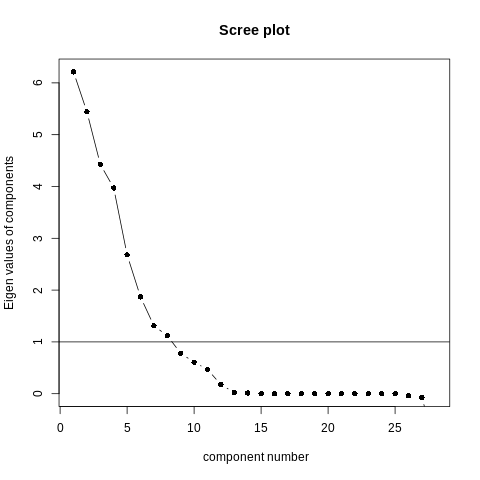

In [ ]:
%%R
scree(bfi_EFA, factors = FALSE)

## *K Means*

In addition, we checked whether our initial set (df_aggregateddata) can be partitioned using the K-means method. The goal was to minimize within-group differences and maximize between-group differences.

In [ ]:

kmeans = KMeans(init = "k-means++", n_clusters=2).fit(df_aggregateddata)
labels1 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=3).fit(df_aggregateddata)
labels2 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=4).fit(df_aggregateddata)
labels3 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=5).fit(df_aggregateddata)
labels4 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=6).fit(df_aggregateddata)
labels5 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=7).fit(df_aggregateddata)
labels6 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=8).fit(df_aggregateddata)
labels7 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=9).fit(df_aggregateddata)
labels8 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=10).fit(df_aggregateddata)
labels9 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=11).fit(df_aggregateddata)
labels10 = kmeans.labels_

kmeans = KMeans(init = "k-means++", n_clusters=12).fit(df_aggregateddata)
labels11 = kmeans.labels_

In [ ]:
s1 = silhouette_score(df_aggregateddata, labels1)
s2 = silhouette_score(df_aggregateddata, labels2)
s3 = silhouette_score(df_aggregateddata, labels3)
s4 = silhouette_score(df_aggregateddata, labels4)
s5 = silhouette_score(df_aggregateddata, labels5)
s6 = silhouette_score(df_aggregateddata, labels6)
s7 = silhouette_score(df_aggregateddata, labels7)
s8 = silhouette_score(df_aggregateddata, labels8)
s9 = silhouette_score(df_aggregateddata, labels9)
s10 = silhouette_score(df_aggregateddata, labels10)
s11 = silhouette_score(df_aggregateddata, labels11)
print(s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11)
s = (s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11)
n_clusters = (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


0.7320238786080315 0.6248523063465744 0.6038417966804642 0.5246916891143018 0.4948329290737344 0.44953861381281895 0.4331511544434903 0.42032147430893047 0.3933307108544108 0.3546742030371897 0.3231574772637838


The highest scores were obtained when two clusters were present, so the data were split into two groups.

Text(0.5, 1.0, 'Visualization of profile results for individual cluster numbers')

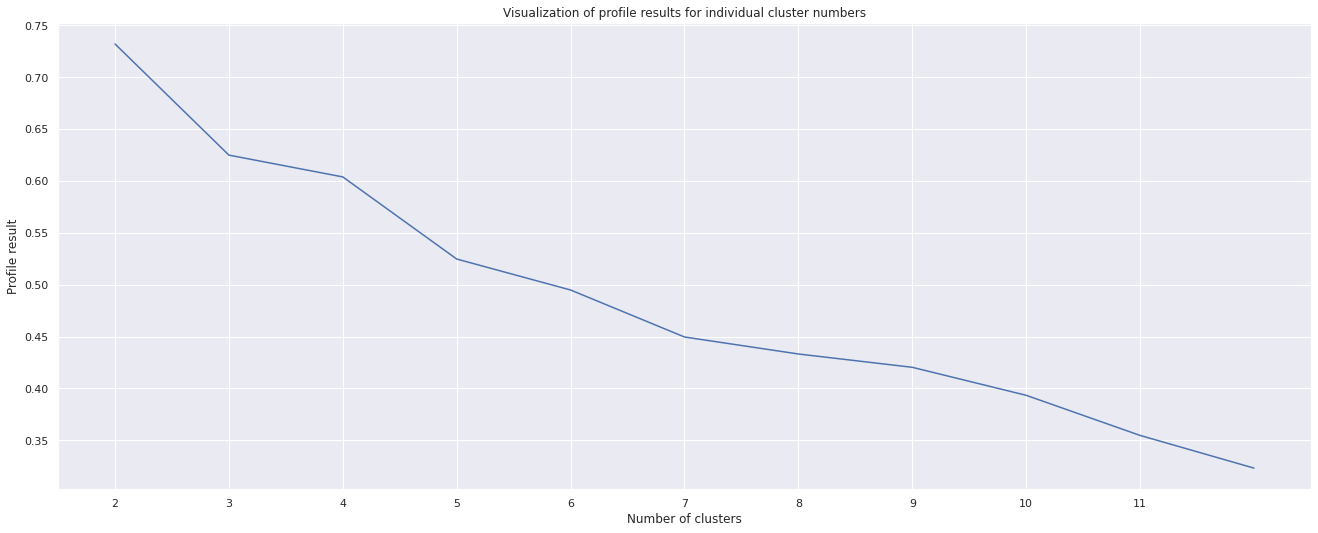

In [ ]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x = n_clusters, y = s)
g.set_xticks(ticks = (2,3,4,5,6,7,8,9,10,11))
g.set(xlabel = "Number of clusters", ylabel = "Profile result");
plt.title('Visualization of profile results for individual cluster numbers')

Splitting the dataset into two groups according to K-means assumptions:
We added a new column to represent the affiliation to a "0" or "1" cluster.

In [ ]:
df_aggregateddata['Clusters'] = labels1
df_aggregateddata

,rok,chrzest,slub,zgon,GUS - Małżeństwa zawarte w gminie,GUS - saldo migracji ogółem,GUS - Ludność w gminie,GUS - Ludność w Polsce stan w dniu 31.XII (tys.),GUS - urodzenia żywe w gminie,GUS - zgony w gminie,CBOS - % Wierzący i praktykujący regularnie,CBOS - % Wierzący i praktykujący nieregularnie,CBOS - % Niewierzący i niepraktykujący,Y_pred,Clusters
119,1997,16.0,4.0,29.0,14.0,-9.0,2938.0,38290.0,39.0,50.0,56.0,32.0,3.0,12.667830,1
120,1998,7.0,4.0,39.0,9.0,5.0,2919.0,38277.0,20.0,55.0,57.0,32.0,3.0,9.471910,1
121,1999,9.0,4.0,23.0,12.0,10.0,2787.0,38263.0,21.0,43.0,58.0,32.0,3.0,8.639066,1
122,2000,8.0,4.0,26.0,10.0,5.0,2697.0,38254.0,23.0,45.0,58.0,32.0,3.0,6.242025,1
123,2001,5.0,7.0,45.0,13.0,-14.0,2747.0,38242.0,25.0,52.0,55.0,33.0,3.0,7.308412,1
124,2002,12.0,1.0,38.0,10.0,4.0,2714.0,38219.0,11.0,53.0,56.0,32.0,3.0,11.049443,1
125,2003,5.0,8.0,31.0,9.0,12.0,2687.0,38191.0,6.0,41.0,55.0,32.0,3.0,4.929259,1
126,2004,9.0,2.0,37.0,6.0,22.0,2671.0,38174.0,18.0,60.0,56.0,31.0,3.0,8.785427,1
127,2005,10.0,4.0,22.0,11.0,-3.0,2707.0,38157.0,18.0,34.0,58.0,32.0,3.0,9.437296,1
128,2006,8.0,3.0,19.0,12.0,3.0,2664.0,38125.0,20.0,41.0,56.0,32.0,4.0,11.619133,1


A clear distinction was made between the two time periods 1997-2009 and 2010-2020

basic statistics for both groups:

In [ ]:
df_aggregateddata.groupby(df_aggregateddata['Clusters']).describe()

rok                    ...     Y_pred                      
         count    mean       std  ...        50%        75%        max
Clusters                          ...                                 
0         11.0  2015.0  3.316625  ...  10.114496  10.369931  13.626762
1         13.0  2003.0  3.894440  ...   8.785427  11.049443  12.677023

[2 rows x 112 columns]

#***appendix***

## ***SNN***
* Spiking neural network was tested to predict orthodox church records, but was deemed unsuccessful due to the small amount of additional supporting data.

* The analysis is illustrative, done with the understanding that the dataset has too few observations to perform a proper SNN analysis 

In [ ]:
X_SNN = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y_SNN = df_aggregateddata["chrzest"].values.reshape(-1,1)

Splitting the dataset into training and testing sections.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X_SNN, Y_SNN, test_size=0.33, random_state=42)

In [ ]:
#X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.10, random_state=1)

In [ ]:
clf = MLPRegressor(solver='adam', learning_rate='adaptive', alpha=1e-5, activation='relu', hidden_layer_sizes=(4,4,4), random_state=2, max_iter=500, batch_size=32)
clf.fit(X_train, Y_train.flatten())

In [ ]:
clf.fit(X_train, Y_train.flatten())

Errors are no too large, but R2 is negative so the chosen model does not follow the trend of the data (expected).

In [ ]:
MSE = mean_squared_error(clf.predict(X_test), Y_test.flatten())
RMSE = np.sqrt(MSE)
RMSE

3.1067426453551805

In [ ]:
mean_absolute_percentage_error(clf.predict(X_test), Y_test.flatten())

0.252532766673292

In [ ]:
R_kw = r2_score(Y_test.flatten(), clf.predict(X_test))
R_kw

-0.13760293061875584

In [ ]:
clf.predict(X_test)

array([ 9.40295926, 10.21165289,  9.08243044, 10.22846701,  9.67222591,
        9.46362575, 10.18617845,  9.10257094])

Comparison of model predictions with actual values.

In [ ]:
print(f'Predicted value of the observation 2 : {clf.predict(X_test)[2]}')
print(f'Real value of observation 2 : {Y_test[2]}')

Predicted value of the observation 2 : 9.082430440636946
Real value of observation 2 : [16.]


In [ ]:
print(f'Predicted value of the observation 5 : {clf.predict(X_test)[5]}')
print(f'Real value of observation 5 : {Y_test[5]}')

Predicted value of the observation 5 : 9.463625751780548
Real value of observation 5 : [8.]


In [ ]:
print(f'Predicted value of the observation 3 : {clf.predict(X_test)[3]}')
print(f'Real value of observation 3 : {Y_test[3]}')

Predicted value of the observation 3 : 10.228467008308455
Real value of observation 3 : [11.]


# ***results***

Main results/findings:







______________________________________________________________


---



# ***references***

Baranowska, A. (2017). Starzenie się społeczeństwa europejskiego jako wyzwanie XXI wieku. Casus Polski,Opuscula sociologiczna 4, 55-66  http://dx.doi.org/10.18276/os.2017.4-04

Ciura, G., Szymańczak, J. (2012). Starzenie się społeczeństwa polskiego. Biuro Analiz Sejmowych, 12(126). Retrieved from http://orka.sejm.gov.pl/wydbas.nsf/0/D5E35E200F187640C1257A29004A756B/$File/Infos_126.pdf on January 26, 2022

Eurostat, (2021). Marriage and divorce statistics. Retrieved from https://ec.europa.eu/eurostat/statisticsexplained/index.php?title=Marriage_and_divorce_statistics#Fewer_marriages.2C_more_divorces on January 26, 2022

Gray, A. (2018).These are the European countries where young people are least religious. World Economic Forum. Retrieved from https://www.weforum.org/agenda/2018/05the-european-countries-where-young-people-are-losing-their-religion/ on January 26,2022


StayPoland. Białowieża. Retrieved from https://www.staypoland.com/pl/bialowieza.htm/ on January 27, 2022 

Tomaszek, A. (2020). Starzejące się społeczeństwo jako wyzwanie społeczne Polski w perspektywie kilkudziesięciu lat. Problemy społeczne XXI wieku. http://dx.doi.org/10.13140/RG.2.2.32151.80808

United Nations. Department of Economic and Social Affairs. (2019). World Population Ageing 2019. Retrieved from https://www.un.org/en/development/desa/population/publications/pdf/ageing/WorldPopulationAgeing2019-Highlights.pdf on January 26, 2022

Wikivoyage. Białowieża. Retrieved from https://pl.wikivoyage.org/wiki/Białowieża on January 27, 2022 